In [2]:
from torchvision import models
import torch

from data_i2l import path2vec

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

model = models.detection.ssdlite320_mobilenet_v3_large(weights='DEFAULT')

model.eval()

im = path2vec('i2l-dataset/mug/mug_01.jpg')

#x = [torch.rand(3, 320, 320)]
x = [im]

predictions = model(x)[0]
print([COCO_INSTANCE_CATEGORY_NAMES[label] for label in predictions['labels']])

['remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'cell phone', 'remote', 'remote', 'remote', 'cell phone', 'remote', 'remote', 'remote', 'remote', 'book', 'remote', 'remote', 'remote', 'clock', 'remote', 'remote', 'dining table', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'tv', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'book', 'remote', 'remote', 'remote', 'book', 'remote', 'remote', 'book', 'remote', 'remote', 'book', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'book', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'book', 'book', 'remote', 'book', 'remote', 'book', 'remote', 'remote', 'remote', 'book', 'book', 'remote', 'book', 'remote', 'book', 'remote', 'book', 'remote', 'remote', 'hot dog', 'book', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', 'remote', '

In [1]:
from torchvision import models
from matplotlib import pyplot as plt

from net_i2l import NetI2L

net = NetI2L()

plt.imshow(net.data.x['knowledge'][0].permute(1, 2, 0))


/Users/kitt/miniconda3/envs/net/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Required knowledge initialized: n = [320, 320], m = 3, pt = 0, pk = 14, labels: {0: 'ball', 1: 'mug', 2: 'pen'}


RuntimeError: Error(s) in loading state_dict for SSD:
	size mismatch for head.classification_head.module_list.0.1.weight: copying a param with shape torch.Size([546, 672, 1, 1]) from checkpoint, the shape in current model is torch.Size([18, 672, 1, 1]).
	size mismatch for head.classification_head.module_list.0.1.bias: copying a param with shape torch.Size([546]) from checkpoint, the shape in current model is torch.Size([18]).
	size mismatch for head.classification_head.module_list.1.1.weight: copying a param with shape torch.Size([546, 480, 1, 1]) from checkpoint, the shape in current model is torch.Size([18, 480, 1, 1]).
	size mismatch for head.classification_head.module_list.1.1.bias: copying a param with shape torch.Size([546]) from checkpoint, the shape in current model is torch.Size([18]).
	size mismatch for head.classification_head.module_list.2.1.weight: copying a param with shape torch.Size([546, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([18, 512, 1, 1]).
	size mismatch for head.classification_head.module_list.2.1.bias: copying a param with shape torch.Size([546]) from checkpoint, the shape in current model is torch.Size([18]).
	size mismatch for head.classification_head.module_list.3.1.weight: copying a param with shape torch.Size([546, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([18, 256, 1, 1]).
	size mismatch for head.classification_head.module_list.3.1.bias: copying a param with shape torch.Size([546]) from checkpoint, the shape in current model is torch.Size([18]).
	size mismatch for head.classification_head.module_list.4.1.weight: copying a param with shape torch.Size([546, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([18, 256, 1, 1]).
	size mismatch for head.classification_head.module_list.4.1.bias: copying a param with shape torch.Size([546]) from checkpoint, the shape in current model is torch.Size([18]).
	size mismatch for head.classification_head.module_list.5.1.weight: copying a param with shape torch.Size([546, 128, 1, 1]) from checkpoint, the shape in current model is torch.Size([18, 128, 1, 1]).
	size mismatch for head.classification_head.module_list.5.1.bias: copying a param with shape torch.Size([546]) from checkpoint, the shape in current model is torch.Size([18]).

In [2]:
from time import time, sleep
from random import choice
import cv2

vid = cv2.VideoCapture(0)

def now():
    return round(time()-t0, 2)

def shot(step, phase, t=None, **dialog):
    print('D:',dialog)
    loss, acc, wrongs, oks = net.evaluate(ret_wrongs=True, ret_oks=True)
    exp[t if t == 0 else now()] = {
        'step': step,
        'phase': phase,
        'labels': net.data.labels,
        'm': net.data.m,
        'pt': {label:net.data.data['train']['labels'].count(label) for label in net.data.labels},
        'loss': loss,
        'acc': acc,
        'wrongs': wrongs,
        'oks': oks,
        'dialog': dialog
    }

print('== Training loop ==')
exp = {}
steps = 100
t0 = time()

shot(step=0, phase='init', t=0)

for step in range(1, steps+1):
    ans = ''
    correction = ''

    ''' webcam '''
    #ret, frame = vid.read()
    #cv2.imshow('frame', frame)
    #sleep(2)
    #fn = 'new_images/test.jpg'
    #cv2.imwrite(fn, frame)

    #sample = fn
    #prompt = fn
    ''' sim '''
    prompt = input('\n\n> ')
    if prompt == 'done':
        break
    
    sample = choice([net.data.data['knowledge']['samples'][idx] for idx in range(len(net.data.data['knowledge']['samples'])) if net.data.data['knowledge']['labels'][idx] == prompt])
    
    shot(step=step, phase='prompted', prompt=prompt)

    ans = net.predict(sample)

    shot(step=step, phase='answered', prompt=prompt, ans=ans)

    correction = input(f'>> Ans: {ans} / Correct class (blank if OK): ')

    shot(step=step, phase='feedbacked', prompt=prompt, ans=ans, correction=correction)

    if correction:
        net.learn(sample=sample, label=correction, verbose=False)
        shot(step=step, phase='retrained', prompt=prompt, ans=ans, correction=correction)
    else:
        if sample not in net.data.data['train']['samples']:
            net.learn(sample=sample, label=ans, verbose=False)
            shot(step=step, phase='tuned', prompt=prompt, ans=ans, correction=correction)
        else:
            shot(step=step, phase='passed', prompt=prompt, ans=ans, correction=correction)

    loss, acc = net.evaluate()
    print(f'== Acc: {acc}, Loss: {loss}')

== Training loop ==
D: {}
D: {'prompt': 'pen'}
D: {'prompt': 'pen', 'ans': 'mug'}
D: {'prompt': 'pen', 'ans': 'mug', 'correction': 'pen'}
Sample i2l-dataset/pen/pen_05.jpg added to train. pt = 1
Final train loss: 0.06894844770431519, dev loss: 1.4564167261123657
D: {'prompt': 'pen', 'ans': 'mug', 'correction': 'pen'}
== Acc: 0.07142857142857142, Loss: 1.456416598388127
D: {'prompt': 'ball'}
D: {'prompt': 'ball', 'ans': 'mug'}
D: {'prompt': 'ball', 'ans': 'mug', 'correction': 'ball'}
Sample i2l-dataset/ball/ball_02.jpg added to train. pt = 2
Final train loss: 0.19335944950580597, dev loss: 1.2912591695785522
D: {'prompt': 'ball', 'ans': 'mug', 'correction': 'ball'}
== Acc: 0.14285714285714285, Loss: 1.2912589609622955
D: {'prompt': 'pen'}
D: {'prompt': 'pen', 'ans': 'mug'}
D: {'prompt': 'pen', 'ans': 'mug', 'correction': 'pen'}
Sample i2l-dataset/pen/pen_01.jpg added to train. pt = 3
Final train loss: 0.031130678951740265, dev loss: 1.1285860538482666
D: {'prompt': 'pen', 'ans': 'mug', 

In [3]:
for t, val in exp.items():
    print(f'== [t={round(t, 2)}] Acc = {val["acc"]}, OKs: ({len(val["oks"])})')
    for ok in val['oks']:
        print(ok)

for w in exp[max(list(exp.keys()))]['wrongs']:
    print(w)

== [t=0] Acc = 0.0, OKs: (0)
== [t=3.1] Acc = 0.0, OKs: (0)
== [t=3.69] Acc = 0.0, OKs: (0)
== [t=5.67] Acc = 0.0, OKs: (0)
== [t=17.44] Acc = 0.2857142857142857, OKs: (4)
('i2l-dataset/pen/pen_03.jpg', 'pen')
('i2l-dataset/pen/pen_01.jpg', 'pen')
('i2l-dataset/pen/pen_02.png', 'pen')
('i2l-dataset/pen/pen_05.jpg', 'pen')
== [t=22.46] Acc = 0.2857142857142857, OKs: (4)
('i2l-dataset/pen/pen_02.png', 'pen')
('i2l-dataset/pen/pen_03.jpg', 'pen')
('i2l-dataset/pen/pen_01.jpg', 'pen')
('i2l-dataset/pen/pen_05.jpg', 'pen')
== [t=23.05] Acc = 0.2857142857142857, OKs: (4)
('i2l-dataset/pen/pen_03.jpg', 'pen')
('i2l-dataset/pen/pen_05.jpg', 'pen')
('i2l-dataset/pen/pen_02.png', 'pen')
('i2l-dataset/pen/pen_01.jpg', 'pen')
== [t=26.14] Acc = 0.2857142857142857, OKs: (4)
('i2l-dataset/pen/pen_01.jpg', 'pen')
('i2l-dataset/pen/pen_05.jpg', 'pen')
('i2l-dataset/pen/pen_03.jpg', 'pen')
('i2l-dataset/pen/pen_02.png', 'pen')
== [t=44.92] Acc = 0.6428571428571429, OKs: (9)
('i2l-dataset/ball/ball_03.j

['ball', 'mug', 'pen']


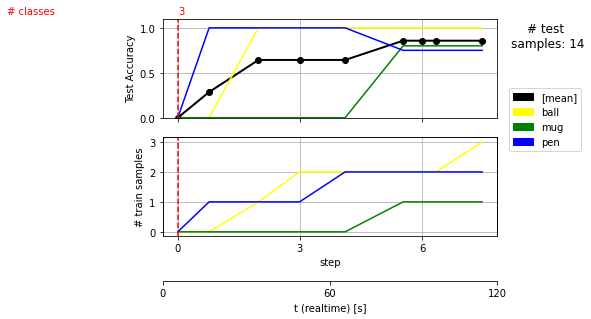

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [4]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

labels = net.data.labels
print(labels)
COLORS = ['yellow', 'green', 'blue', 'purple', 'orange', 'maroon', 'cyan', 'brown', 'pink']
lab2COL = {label:col for label, col in zip(labels, COLORS)}

fig, ax = plt.subplots(2, 1, sharex = True)

# Taking the states at the end of each iteration
ts = sorted([key for key, val in exp.items() if val['step'] == 0 or val['phase'] in ('tuned', 'passed', 'retrained')])
steps = [exp[t]['step'] for t in ts]

# == AX0: Acc
ax[0].plot(ts, [exp[t]['acc'] for t in ts], 'ko-', linewidth='2')

for label in labels:
    try:
        acc_ = []
        for t in ts:
            if label in exp[t]['labels']:
                wr = len([w for w in exp[t]['wrongs'] if w[1] == label])
                ok = len([o for o in exp[t]['oks'] if o[1] == label])
                acc_.append(ok/(ok+wr))

        ax[0].plot(ts[-len(acc_):], acc_, '-', color=lab2COL[label])
    except ZeroDivisionError:
        print(f'W: label {label} not in test data.')

ax[0].set_title(f'# test \nsamples: {net.data.pk}', y=0.65, x=1.15)
ax[0].set_ylim([0, 1.1])
ax[0].set_ylabel('Test Accuracy')
ax[0].grid()

# == AX1: Samples
for label in labels:
    ns = [exp[t]['pt'][label] for t in ts if label in exp[t]['labels']]
    ax[1].plot(ts[-len(ns):], ns, '-', color=lab2COL[label])

#w = 0.2
#for t, step in zip(ts, steps):
#    if step % 1 == 0:
#        for li, label in enumerate(labels):
#            ax[1].bar(t-w*(len(labels)/2)+(w*li), exp[t]['pt'][label], width=w, color=lab2COL[label])

#ax[1].plot(steps, [net.data.pk]*len(steps), '--', color='darkgreen', linewidth='2')

ax[1].set_ylabel('# train samples')
#ax[1].set_ylim(bottom=0, top=max(n_train_max_)+2)
ax[1].set_xlabel('step')
ax[1].set_xticks([t for i, t in enumerate(ts) if i%3 == 0])
ax[1].set_xticklabels([s for i, s in enumerate(steps) if i%3 == 0])

ax[1].legend(
    bbox_to_anchor=(1.02, 1.55),
    handles=[mpatches.Patch(color='black', label='[mean]')]+[mpatches.Patch(color=lab2COL[label], label=label) for label in labels])

ax[1].grid()
axt = ax[1].twiny()
axt.set_xlabel('t (realtime) [s]')
ticklabels = [t for t in range(int(ts[-1])) if t % 60 == 0]
axt.set_xticks(ticklabels)
axt.set_xticklabels(ticklabels)

# Move twinned axis ticks and label from top to bottom
axt.xaxis.set_ticks_position("bottom")
axt.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
axt.spines["bottom"].set_position(("axes", -0.45))

ax[0].text(-95, 1.15, '# classes', color='red')
ax[0].axvline(x=0, color='red', linestyle='--')
ax[1].axvline(x=0, color='red', linestyle='--')
ax[0].text(0, 1.15, exp[ts[0]]['m'], color='red')
for tim1, t in enumerate(ts[1:]):
    if exp[t]['m'] != exp[ts[tim1]]['m']:
        ax[0].axvline(x=t, color='red', linestyle='--')
        ax[1].axvline(x=t, color='red', linestyle='--')
        ax[0].text(t, 1.15, exp[t]['m'], color='red')

plt.show()
fig.savefig('test.jpg', bbox_inches='tight', dpi=350)
fig.savefig('test.eps', bbox_inches='tight')